<a href="https://colab.research.google.com/github/DheniMoura/Python_Cursos-livres/blob/main/Lets-Code_Projeto-dados-Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import requests as r

In [10]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

In [11]:
resp.status_code #esperado '200'

200

In [12]:
raw_data = resp.json()

In [13]:
raw_data[0]

{'Active': 1,
 'City': '',
 'CityCode': '',
 'Confirmed': 1,
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Date': '2020-02-26T00:00:00Z',
 'Deaths': 0,
 'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Province': '',
 'Recovered': 0}

In [14]:
final_data = []
for obs in raw_data:
  final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [15]:
final_data.insert(0, ['Confirmados', 'Óbitos', 'Recuperados', 'Ativos', 'Data'])
final_data

[['Confirmados', 'Óbitos', 'Recuperados', 'Ativos', 'Data'],
 [1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-06T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-07T00:00:00Z'],
 [20, 0, 0, 20, '2020-03-08T00:00:00Z'],
 [25, 0, 0, 25, '2020-03-09T00:00:00Z'],
 [31, 0, 0, 31, '2020-03-10T00:00:00Z'],
 [38, 0, 0, 38, '2020-03-11T00:00:00Z'],
 [52, 0, 0, 52, '2020-03-12T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-13T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-14T00:00:00Z'],
 [162, 0, 0, 162, '2020-03-15T00:00:00Z'],
 [200, 0, 1, 199, '2020-03-16T00:00:00Z'],
 [321, 1, 2, 318, '2020-03-17T00:00:00Z'],
 [372, 3, 2, 367, '2020-03-18T00:00:00Z'],
 [621, 6, 2, 613, '2020-03-19T00:00:00Z'],


In [16]:
CONFIRMADOS = 0
OBRITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4


In [17]:
#"Limpando" a data
for i in range(1, len(final_data)):
  final_data[i][DATA] = final_data[i][DATA][:10]
final_data

[['Confirmados', 'Óbitos', 'Recuperados', 'Ativos', 'Data'],
 [1, 0, 0, 1, '2020-02-26'],
 [1, 0, 0, 1, '2020-02-27'],
 [1, 0, 0, 1, '2020-02-28'],
 [2, 0, 0, 2, '2020-02-29'],
 [2, 0, 0, 2, '2020-03-01'],
 [2, 0, 0, 2, '2020-03-02'],
 [2, 0, 0, 2, '2020-03-03'],
 [4, 0, 0, 4, '2020-03-04'],
 [4, 0, 0, 4, '2020-03-05'],
 [13, 0, 0, 13, '2020-03-06'],
 [13, 0, 0, 13, '2020-03-07'],
 [20, 0, 0, 20, '2020-03-08'],
 [25, 0, 0, 25, '2020-03-09'],
 [31, 0, 0, 31, '2020-03-10'],
 [38, 0, 0, 38, '2020-03-11'],
 [52, 0, 0, 52, '2020-03-12'],
 [151, 0, 0, 151, '2020-03-13'],
 [151, 0, 0, 151, '2020-03-14'],
 [162, 0, 0, 162, '2020-03-15'],
 [200, 0, 1, 199, '2020-03-16'],
 [321, 1, 2, 318, '2020-03-17'],
 [372, 3, 2, 367, '2020-03-18'],
 [621, 6, 2, 613, '2020-03-19'],
 [793, 11, 2, 780, '2020-03-20'],
 [1021, 15, 2, 1004, '2020-03-21'],
 [1546, 25, 2, 1519, '2020-03-22'],
 [1924, 34, 2, 1888, '2020-03-23'],
 [2247, 46, 2, 2199, '2020-03-24'],
 [2554, 59, 2, 2493, '2020-03-25'],
 [2985, 77, 6, 2

In [18]:
import datetime as dt

In [19]:
import csv

In [20]:
with open('brasil-covid.csv', 'w') as file:
  writer = csv.writer(file)
  writer.writerows(final_data)

In [21]:
for i in range(1, len(final_data)):
  # dt.datetime.strptime() para transformar string em data
  final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')
  # '%Y-%m-%d' para formatar a data

In [22]:
final_data

[['Confirmados', 'Óbitos', 'Recuperados', 'Ativos', 'Data'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)],
 [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)],
 [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)],
 [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)],
 [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)],
 [151, 0, 0, 151, datetime.da

##API para renderização de dados

In [23]:
#Função que define os dados
def get_datasets(y, labels):
  if type(y[0]) == list:
    datasets = []
    for i in range(len(y)):
      datasets.append({
          'label': labels[i],
          'data': y[i]
      })
    return datasets
  else:
    return[
           {
               'label': labels[0],
                'data': y
           }
    ]

In [42]:
#Função que define o título
def set_title(title=''):
  if title != '':
    display = 'true'
  else:
    display = 'false'
  return{
      'title': title,
      'display': display
  }

In [44]:
#Funçlão que cria o dicionário que representa o gráfico
def create_chart(x, y, labels, kind='bar', title=''):
  datasets = get_datasets(y, labels)
  options = set_title(title) #chave responsável pela definição do título e outros

  chart = {
      'type': kind,
      'data': {
          'labels': x,
          'datasets': datasets
      },
      'options': options
  }

  return chart

In [45]:
#Função que faz a requisição na API, utilizando o dicionário
def get_api_chart(chart):
  url_base = 'https://quickchart.io/chart'
  resp = r.get(f'{url_base}?c={str(chart)}') #Essa chamada da API retorna a imagem
  return resp.content #guarda o valor binário da imagem (gráfico)

In [46]:
#função que salva a imgem retornada da api
def save_image(path, content):
  with open(path, 'wb')as image:
    image.write(content)

In [47]:
#para a função de mostrar a imagem
from PIL import  Image
from IPython.display import display

In [48]:
#Função para mostrar a imagem
def display_image(path):
  img_pil = Image.open(path)
  display(img_pil)

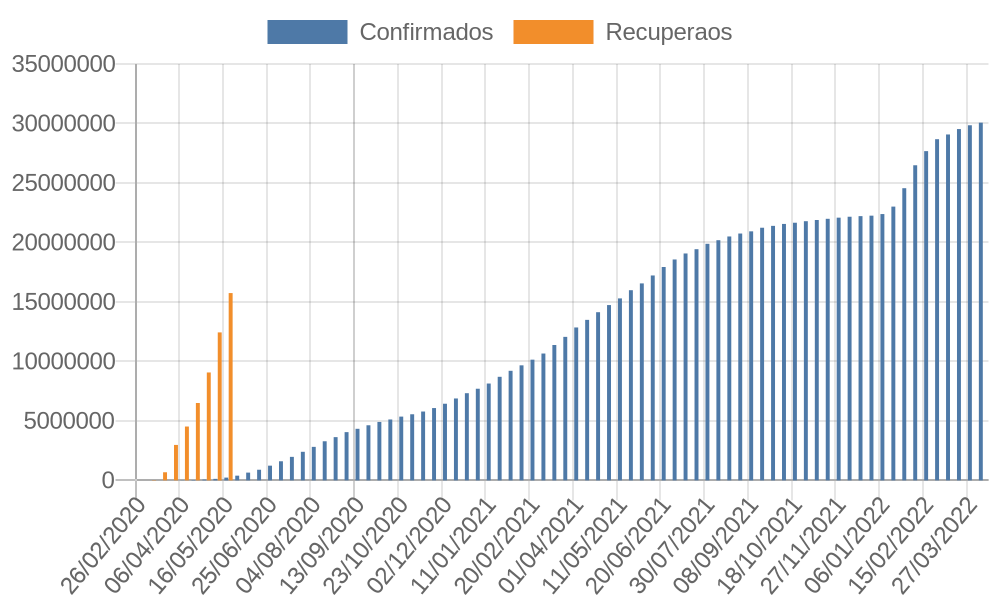

In [58]:
y_data_1 = []
for obs in final_data[1::10]: #coletando dados a cada dez dias
  y_data_1.append(obs[CONFIRMADOS])

y_data_2 = []
for obs in final_data[1::60]: #coletando dados a cada sessenta dias
  y_data_2.append(obs[RECUPERADOS])

labels = ['Confirmados', 'Recuperaos']

x = []
for obs in final_data[1::10]: #coletando dados a cada dez dias
  x.append(obs[DATA].strftime('%d/%m/%Y'))

chart = create_chart(x, [y_data_1, y_data_2], labels, title='Gráfico confirmado x recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-gráfico.png', chart_content)
display_image('meu-primeiro-gráfico.png')

In [55]:
from urllib.parse import quote

In [56]:
#Gerando QR code com link direto para o gráfico
def get_api_qrcode(link):
  texto = quote(link) #parsing do link para url
  url_base = 'https://quickchart.io/qr'
  resp = r.get(f'{url_base}?text={texto}')
  return resp.content

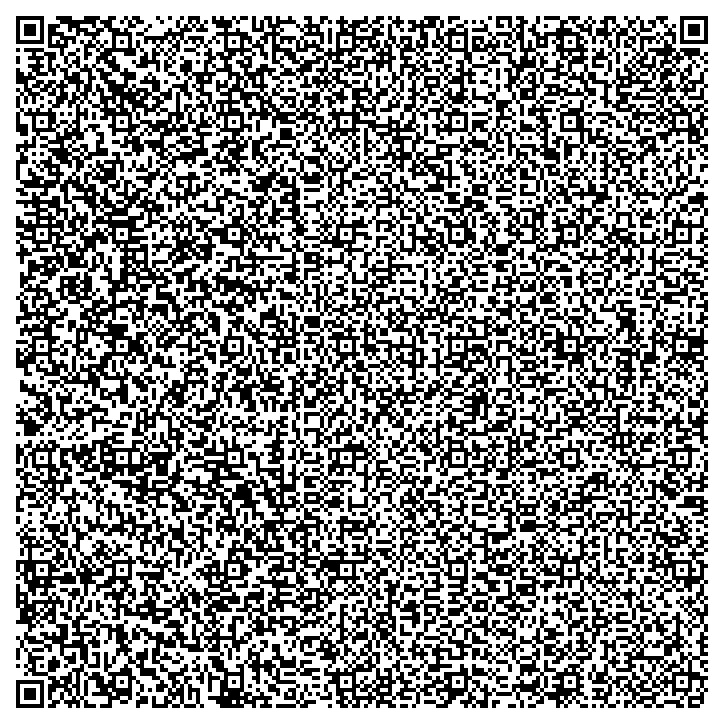

In [59]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')